# Neural Networks

## Building the Neural Networks

Use the following dataset https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction?select=train.csv to build three different neural networks using

> different layers


> activation functions


> number of neurons per layer


> number of layers











In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data pre-processing

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import keras
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/VNP/Labs/train.csv')

In [ ]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
data.isnull().sum()


id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
data['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [ ]:
def encode_gender(x):
  if type(x)==float:
    return x
  if "Male" in x:
    return 1
  if "Female" in x:
    return 2



In [ ]:
data = data.drop(columns=['id'])

In [ ]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
data['Gender'] = data['Gender'].apply(encode_gender)

In [ ]:
data['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [ ]:
def encode_vehicle_age(x):
  if type(x)==float:
    return x
  if "1-2 Year" in x:
    return 1
  if "< 1 Year" in x:
    return 2
  if "> 2 Years" in x:
    return 3

In [ ]:
data['Vehicle_Age'] = data['Vehicle_Age'].apply(encode_vehicle_age)

In [ ]:
data['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [ ]:
def encode_damage(x):
  if type(x)==float:
    return x
  if "Yes" in x:
    return 1
  if "No" in x:
    return 2

In [ ]:
data['Vehicle_Damage'] = data['Vehicle_Damage'].apply(encode_damage)

In [ ]:
x, y = data.drop(columns='Response'), data['Response']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
scaler = StandardScaler()

In [ ]:
x.describe()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,1.459239,38.822584,0.997869,26.388807,0.458210,1.516388,1.495123,30564.389581,112.034295,154.347397
std,0.498336,15.511611,0.046110,13.229888,0.498251,0.577698,0.499977,17213.155057,54.203995,83.671304
min,1.000000,20.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2630.000000,1.000000,10.000000
25%,1.000000,25.000000,1.000000,15.000000,0.000000,1.000000,1.000000,24405.000000,29.000000,82.000000
50%,1.000000,36.000000,1.000000,28.000000,0.000000,1.000000,1.000000,31669.000000,133.000000,154.000000
75%,2.000000,49.000000,1.000000,35.000000,1.000000,2.000000,2.000000,39400.000000,152.000000,227.000000
max,2.000000,85.000000,1.000000,52.000000,1.000000,3.000000,2.000000,540165.000000,163.000000,299.000000


In [ ]:
y.describe()

count    381109.000000
mean          0.122563
std           0.327936
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Response, dtype: float64

In [ ]:
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Neural Network 1

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#### Optimize number of epochs and batch size for NN1

In [ ]:
model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.Accuracy(), keras.metrics.Precision(), keras.metrics.Recall()])

In [ ]:
history = model.fit(x_train, y_train, epochs=3, batch_size=8)

Epoch 1/3
38111/38111 [==============================] - 115s 3ms/step - loss: 0.2712 - accuracy: 0.0000e+00 - precision: 0.3143 - recall: 5.8961e-04
Epoch 2/3
38111/38111 [==============================] - 95s 3ms/step - loss: 0.2690 - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/3
38111/38111 [==============================] - 91s 2ms/step - loss: 0.2687 - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00


In [ ]:
 history.history

{'loss': [0.2711690664291382, 0.26897454261779785, 0.26865750551223755],
 'accuracy': [0.0, 0.0, 0.0],
 'precision': [0.3142857253551483, 0.0, 0.0],
 'recall': [0.0005896068178117275, 0.0, 0.0]}

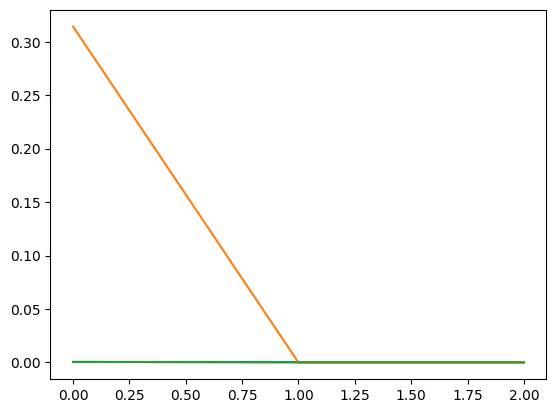

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['precision'])
plt.plot(history.history['recall'])

### Neural Network 2

In [ ]:
model2 = Sequential()
model2.add(Dense(128,activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1,activation='sigmoid'))

In [ ]:

model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.Accuracy(), keras.metrics.Precision(), keras.metrics.Recall()])

#### Optimize number of epochs and batch size for NN2

In [ ]:
history = model.fit(x_train, y_train.values, epochs=2, batch_size=10)

Epoch 1/2
30489/30489 [==============================] - 78s 3ms/step - loss: 0.2683 - accuracy: 0.0000e+00 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 2/2
30489/30489 [==============================] - 76s 2ms/step - loss: 0.2681 - accuracy: 0.0000e+00 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00


In [ ]:
 history.history

{'loss': [0.2682631313800812, 0.2680968940258026],
 'accuracy': [0.0, 0.0],
 'precision_1': [0.0, 0.0],
 'recall_1': [0.0, 0.0]}

### Neural Network 3

In [ ]:
model3 = Sequential()
model3.add(Dense(128,activation='relu'))
model3.add(Dense(256, activation='relu'))
model3.add(Dense(256, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(1,activation='sigmoid'))

#### Optimize number of epochs and batch size for NN3

In [ ]:
model3.compile(loss=keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.Accuracy(), keras.metrics.Precision(), keras.metrics.Recall()])

In [ ]:
history = model.fit(x_train, y_train.values, epochs=3, batch_size=50)

Epoch 1/3
6098/6098 [==============================] - 15s 2ms/step - loss: 0.2674 - accuracy: 0.0000e+00 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 2/3
6098/6098 [==============================] - 18s 3ms/step - loss: 0.2672 - accuracy: 0.0000e+00 - precision_1: 1.0000 - recall_1: 2.6800e-05
Epoch 3/3
6098/6098 [==============================] - 15s 2ms/step - loss: 0.2671 - accuracy: 0.0000e+00 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00


In [ ]:
history.history

{'loss': [0.26736974716186523, 0.2672025263309479, 0.26714253425598145],
 'accuracy': [0.0, 0.0, 0.0],
 'precision_1': [0.0, 1.0, 0.0],
 'recall_1': [0.0, 2.6800311388797127e-05, 0.0]}

## Evaluate the three NNs

In [ ]:
models = [model, model2, model3]

In [ ]:
import numpy as np

In [ ]:
mean_squared=[]
mean_absolute=[]
r2=[]

In [ ]:
for model in models:
  preds = model.predict(x_test)
  print(preds.shape)
  # preds = scaler.inverse_transform(preds)
  mean_squared.append(mean_squared_error(y_test,preds))
  mean_absolute.append(mean_absolute_error(y_test,preds))
  r2.append(r2_score(y_test,preds))

2382/2382 [==============================] - 5s 2ms/step
(76222, 1)
2382/2382 [==============================] - 5s 2ms/step
(76222, 1)
2382/2382 [==============================] - 5s 2ms/step
(76222, 1)


In [ ]:
r2

[0.183714477693931, -1.0080785847757894, -1.6145374300511381]

In [ ]:
mean_squared

[0.0882286446982103, 0.217044216932513, 0.2825936362493277]

In [ ]:
mean_absolute

[0.17862991930648625, 0.46205849927579035, 0.5307665944094734]

## Results analysis